<a href="https://colab.research.google.com/github/ashikasarker/tensorflow/blob/main/image_classification_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
print(tf.__version__)

2.19.0


In [ ]:
cifar_10 =  tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar_10.load_data()
class_names = ['airplane', 'car', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
print(train_images.shape, train_images.dtype, train_images.min(), train_images.max())

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step
(50000, 32, 32, 3) uint8 0 255


In [ ]:
classes_to_move = [1, 3, 4, 6]
num_to_move = 100

indices_to_move = []

for labels in classes_to_move:
    cls_indices = np.where(test_labels.flatten() == labels)[0]
    selected = np.random.choice(cls_indices, num_to_move, replace=False)
    indices_to_move.extend(selected)


In [ ]:
x_move = test_images[indices_to_move]
y_move = test_labels[indices_to_move]

# Remove from test set
test_images = np.delete(test_images, indices_to_move, axis=0)
test_labels = np.delete(test_labels, indices_to_move, axis=0)

# Add to training set
train_images = np.concatenate([train_images, x_move], axis=0)
train_labels = np.concatenate([train_labels, y_move], axis=0)

print(train_images.shape, train_images.dtype, train_images.min(), train_images.max())


(50400, 32, 32, 3) uint8 0 255


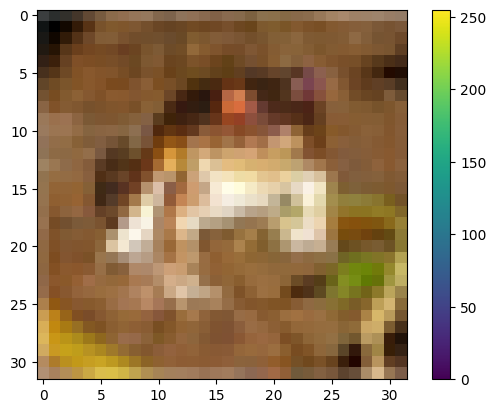

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0
train_labels.shape

(50400, 1)

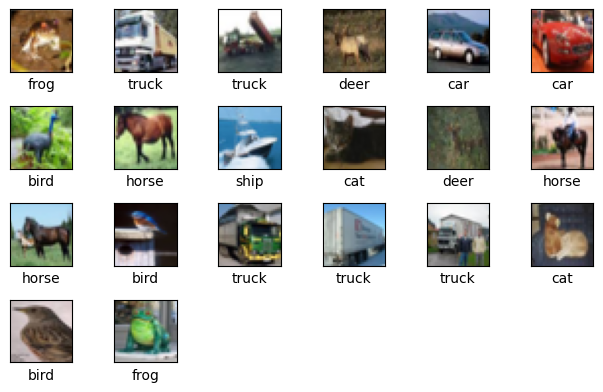

In [ ]:
plt.figure()
for i in range(20):
  plt.subplot (5, 6, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]])
plt.tight_layout()
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001), input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D((2,2)),
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer= tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10)

])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs = 7)

Epoch 1/7
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.3188 - loss: 1.8827
Epoch 2/7
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5011 - loss: 1.4710
Epoch 3/7
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5576 - loss: 1.3611
Epoch 4/7
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5917 - loss: 1.2855
Epoch 5/7
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6122 - loss: 1.2424
Epoch 6/7
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6267 - loss: 1.2052
Epoch 7/7
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6403 - loss: 1.1760


In [ ]:
test_loss, test_accuaracy = model.evaluate(test_images, test_labels, verbose=2)
print("Test accuracy: ", test_accuaracy*100)

300/300 - 2s - 8ms/step - accuracy: 0.6660 - loss: 1.1250
Test accuracy:  66.60416722297668


In [ ]:
model_probability = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = model_probability.predict(test_images)
predictions[0]


300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([0.02320329, 0.00304081, 0.04662313, 0.5847975 , 0.00596931,
       0.13274437, 0.04982107, 0.00433912, 0.13338242, 0.01607888],
      dtype=float32)

In [ ]:
print(np.argmax(predictions[0]))
print(class_names[3])

3
cat


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  #true_label, img = true_label[i][0], img[i][0]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  #true_label = true_label[i][0]
  plt.grid(False)
  plt.xticks(range(10))
  #plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  plt.xlabel('Class index')
  plt.ylabel('Prediction Probabilities')
  plt.tight_layout()

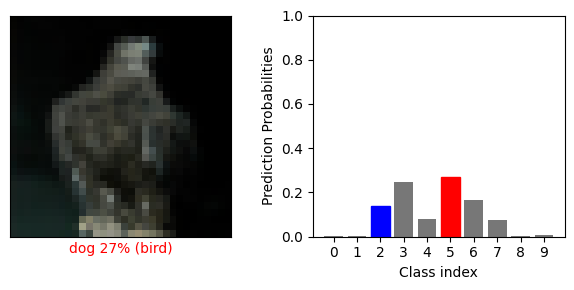

In [ ]:
i = 112
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels[i][0], test_images[i])
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels[i][0])
plt.show()

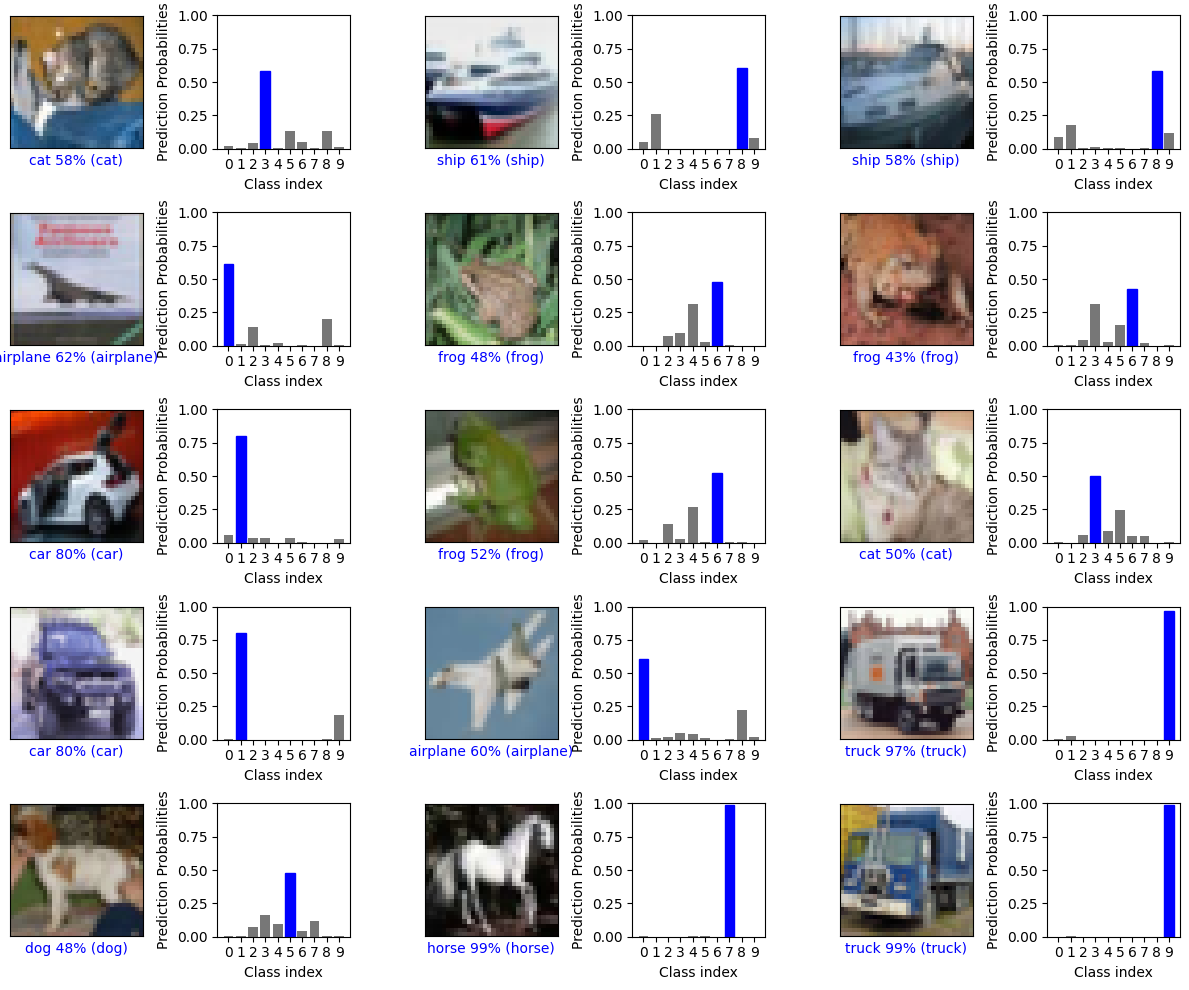

In [ ]:
#num_rows = 5
#num_cols = 3
num_images = 15
plt.figure(figsize=(2*2*3, 2*5))
for i in range(num_images):
  plt.subplot(5, 6, 2*i+1)
  plot_image(i, predictions[i], test_labels[i][0], test_images[i])
  plt.subplot(5, 6, 2*i+2)
  plot_value_array(i, predictions[i], test_labels[i][0])
plt.tight_layout()
plt.show()

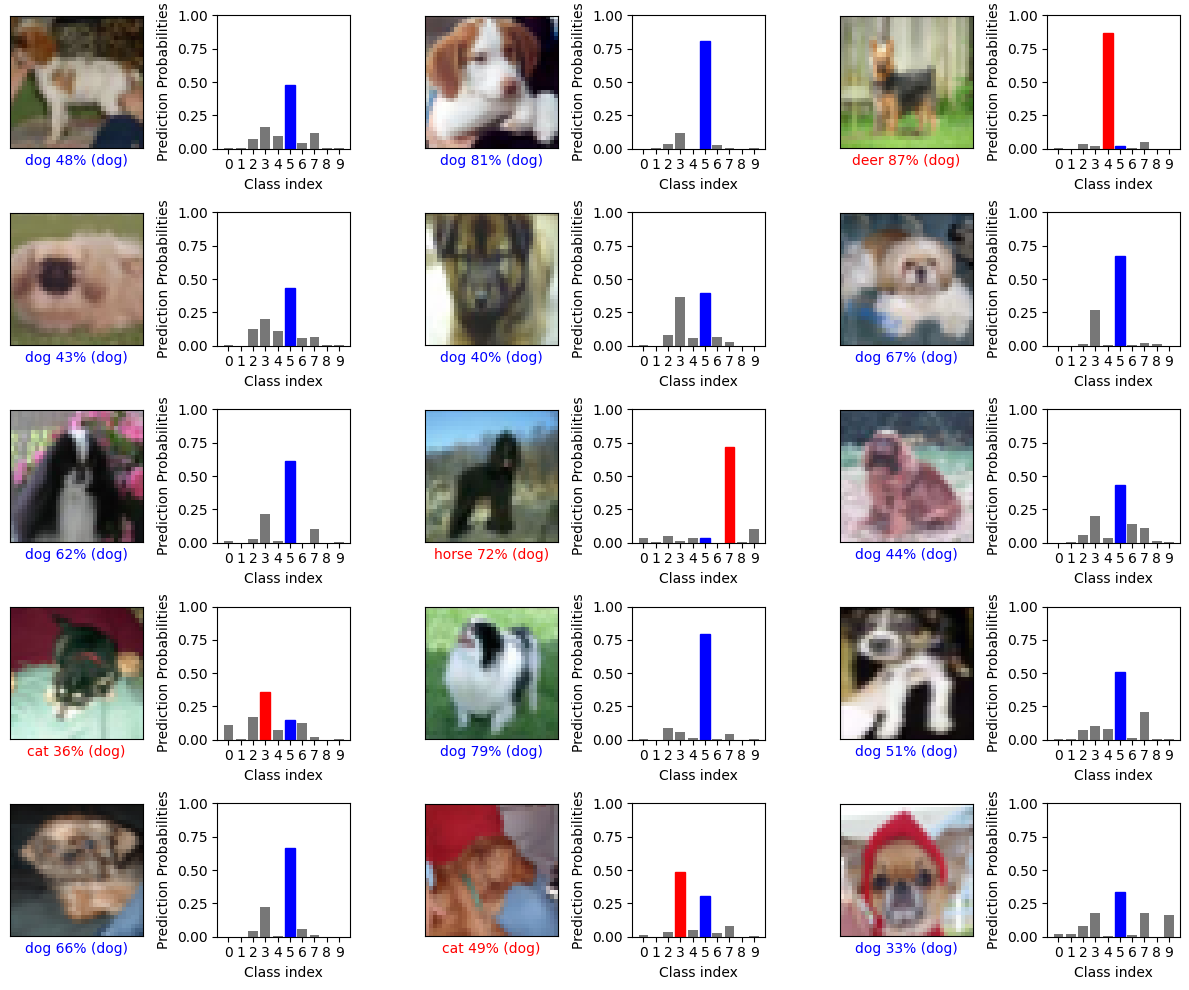

In [ ]:
dog_indices = np.where(test_labels.flatten() == 5)[0]  # CIFAR-10 dog label = 5

num_images = 15  # number of dog images to plot
plt.figure(figsize=(2*2*3, 2*5))

for idx, i in enumerate(dog_indices[:num_images]):
    plt.subplot(5, 6, 2*idx+1)
    plot_image(i, predictions[i], test_labels[i][0], test_images[i])
    plt.subplot(5, 6, 2*idx+2)
    plot_value_array(i, predictions[i], test_labels[i][0])

plt.tight_layout()
plt.show()